# Import data

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle

In [2]:
data = LoadData(37)

In [3]:
df = data.load_data()
df = shuffle(df)
print(df.shape)
df.head()

no image
no image
no image
no image
no image
no image
(549, 4)


,blue,green,red,label
177,159,65,99,13
255,13,103,244,1
85,207,143,65,10
290,63,169,46,7
486,204,139,65,11


## Prepare data 

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
X = np.array(df.drop(['label'],axis=1))
# X = scale(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_val = np_utils.to_categorical(y_test)
dummy_y = np_utils.to_categorical(y_train)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train

c:\users\asus\appdata\local\programs\python\python3.6.5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\asus\appdata\local\programs\python\python3.6.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\asus\appdata\local\programs\python\python3.6.5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted 

array([[ 0.8662298 , -1.5241501 , -0.7050624 ],
       [-0.70137423, -0.36973518,  1.3576837 ],
       [ 0.87962806, -1.7852677 , -1.3007218 ],
       ...,
       [ 0.4106867 ,  1.6642339 ,  1.0157311 ],
       [-0.66117924, -1.1943172 ,  1.0708847 ],
       [ 1.5093493 ,  0.02881281, -1.3117524 ]], dtype=float32)

# Create model

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D,Conv2D, BatchNormalization,MaxPool1D,Flatten,MaxPool2D

## First model

In [31]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(3,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(15, activation='softmax'))

## Second model 

In [6]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(3,)))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(15,activation='softmax'))


## Conv2D - not finished

In [134]:
from keras import backend as K
K.set_image_dim_ordering('th')

model = Sequential()

model.add(Conv2D(filters=15,kernel_size=(1,1),activation='relu',input_shape=(3,3,1)))
model.add(BatchNormalization())


# model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15,activation='softmax'))
X_train = X_train.reshape(-1, 3, 3, 1)
X_test = X_test.reshape(-1, 3, 3, 1)
# do poprawy reshape dummy i y_val macierzy 
X_train.shape, X_test.shape, dummy_y.shape, y_val.shape

((89, 3, 3, 1), (30, 3, 3, 1), (267, 15), (90, 15))

In [7]:
# Testing different optimizers
from keras.optimizers import Adagrad, Adamax, Nadam, SGD, RMSprop, Adam
sgd = SGD(lr=0.01) # accuracy - 70,67%
adagrad = Adagrad() # accuracy - 75%
adamax = Adamax() # 74%

In [8]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

## Fit model

In [10]:
# I used 100 epoches
history = model.fit(X_train, dummy_y, epochs=100, verbose=1, batch_size=16, validation_data=(X_test,y_val))

Train on 411 samples, validate on 138 samples
Epoch 1/100
411/411 [==============================] - 0s 662us/step - loss: 1.4918 - acc: 0.4112 - val_loss: 1.3810 - val_acc: 0.4638
Epoch 2/100
411/411 [==============================] - 0s 465us/step - loss: 1.3306 - acc: 0.4720 - val_loss: 1.3504 - val_acc: 0.6014
Epoch 3/100
411/411 [==============================] - 0s 483us/step - loss: 1.2766 - acc: 0.5353 - val_loss: 1.3806 - val_acc: 0.5580
Epoch 4/100
411/411 [==============================] - 0s 522us/step - loss: 1.2579 - acc: 0.5304 - val_loss: 1.3837 - val_acc: 0.5942
Epoch 5/100
411/411 [==============================] - 0s 514us/step - loss: 1.2085 - acc: 0.5766 - val_loss: 1.2925 - val_acc: 0.6449
Epoch 6/100
411/411 [==============================] - 0s 670us/step - loss: 1.1561 - acc: 0.5937 - val_loss: 1.3882 - val_acc: 0.5507
Epoch 7/100
411/411 [==============================] - 0s 450us/step - loss: 1.1982 - acc: 0.5693 - val_loss: 1.2368 - val_acc: 0.6594
Epoch 8/1

Epoch 61/100
411/411 [==============================] - 0s 445us/step - loss: 0.7572 - acc: 0.7664 - val_loss: 1.2184 - val_acc: 0.6812
Epoch 62/100
411/411 [==============================] - 0s 442us/step - loss: 0.7355 - acc: 0.7640 - val_loss: 1.2775 - val_acc: 0.6594
Epoch 63/100
411/411 [==============================] - 0s 427us/step - loss: 0.7344 - acc: 0.7786 - val_loss: 1.2637 - val_acc: 0.6667
Epoch 64/100
411/411 [==============================] - 0s 434us/step - loss: 0.7697 - acc: 0.7616 - val_loss: 1.2809 - val_acc: 0.6667
Epoch 65/100
411/411 [==============================] - 0s 490us/step - loss: 0.7606 - acc: 0.7543 - val_loss: 1.3027 - val_acc: 0.6884
Epoch 66/100
411/411 [==============================] - 0s 417us/step - loss: 0.7711 - acc: 0.7445 - val_loss: 1.2965 - val_acc: 0.6594
Epoch 67/100
411/411 [==============================] - 0s 424us/step - loss: 0.7221 - acc: 0.7591 - val_loss: 1.2976 - val_acc: 0.6812
Epoch 68/100
411/411 [==========================

In [12]:
pred = model.predict(X_test)
# for i in range(len(pred)):
#     print(np.max(pred[i]))
y_pred = pred.argmax(axis=1)
for i in range(len(y_pred)):
    print('True : {} Pred : {}'.format(y_test[i],y_pred[i]))

True : 9 Pred : 9
True : 13 Pred : 13
True : 9 Pred : 9
True : 5 Pred : 5
True : 3 Pred : 2
True : 1 Pred : 0
True : 1 Pred : 1
True : 7 Pred : 7
True : 10 Pred : 10
True : 11 Pred : 0
True : 4 Pred : 1
True : 12 Pred : 10
True : 7 Pred : 7
True : 3 Pred : 3
True : 5 Pred : 5
True : 6 Pred : 6
True : 2 Pred : 2
True : 1 Pred : 1
True : 10 Pred : 8
True : 8 Pred : 8
True : 4 Pred : 1
True : 11 Pred : 12
True : 11 Pred : 11
True : 0 Pred : 1
True : 14 Pred : 14
True : 14 Pred : 14
True : 10 Pred : 10
True : 10 Pred : 10
True : 8 Pred : 6
True : 0 Pred : 1
True : 11 Pred : 10
True : 5 Pred : 5
True : 10 Pred : 10
True : 4 Pred : 3
True : 14 Pred : 14
True : 0 Pred : 1
True : 13 Pred : 14
True : 2 Pred : 0
True : 11 Pred : 12
True : 8 Pred : 8
True : 3 Pred : 3
True : 13 Pred : 13
True : 6 Pred : 6
True : 3 Pred : 1
True : 1 Pred : 1
True : 4 Pred : 4
True : 9 Pred : 9
True : 5 Pred : 5
True : 9 Pred : 9
True : 3 Pred : 3
True : 13 Pred : 13
True : 5 Pred : 5
True : 12 Pred : 13
True : 5 P

In [77]:
# model.save('nn-adamax-100epochs-29data-77%.h5')

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6666666666666666

## Plot loss and accuracy score

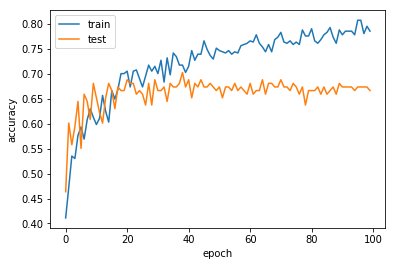

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# score 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

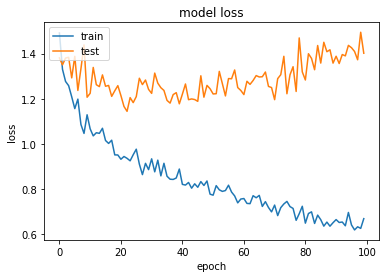

In [15]:
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()